In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/teleCust.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Best k: 14, Accuracy: 0.3833

Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.52      0.46        83
           2       0.31      0.23      0.27        65
           3       0.45      0.49      0.47        83
           4       0.28      0.23      0.25        69

    accuracy                           0.38       300
   macro avg       0.36      0.37      0.36       300
weighted avg       0.37      0.38      0.37       300

Confusion Matrix:
 [[43  8 19 13]
 [15 15 16 19]
 [23 10 41  9]
 [22 15 16 16]]


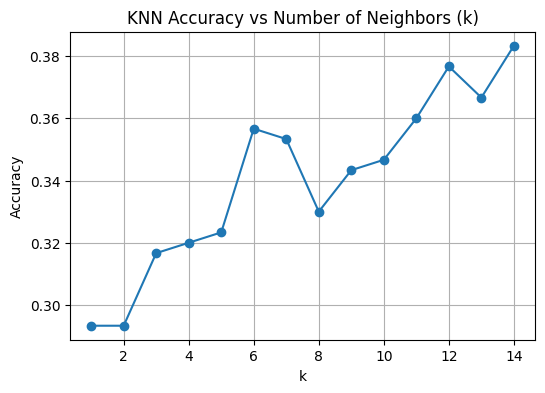

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("teleCust.csv")  # replace with your actual filename

# Separate features and target
X = df.drop("custcat", axis=1)
y = df["custcat"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different K values
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Choose best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}, Accuracy: {max(accuracies):.4f}")

# Final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
